In [1]:
# Data import and exploratory 

import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm

# Data visualization


import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Creeting a cluster

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.decomposition import PCA

#from scipy import stats

# Split the data and work with unbalanced class
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Model Creation

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Evaluate the models

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,precision_score, recall_score,accuracy_score,classification_report

# setting Jupyter outputs

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)
pd.options.display.float_format= '{:.2f}'.format

In [2]:
# Import the dataset

clients = pd.read_csv('Clients.csv')
target = pd.read_csv('Clients-target.csv')
clients_mov1 = pd.read_csv('Clients-mov-201604.201710.csv')
clients_mov2 = pd.read_csv('Clients-mov-201711.201806.csv')

In [3]:
clients.head()

cid  branch_amount_1  branch_amount_2  branch_amount_3  \
0  55600018227             0.00             0.00           192.00   
1  55600021052           144.69             0.00            16.19   
2  55600021210             0.00           141.29           138.60   
3  55600021232             0.00             0.00           380.18   
4  55600028433             0.00           623.24           230.23   

   branch_amount_4  promo  days_clients  branches  promos_sent  promos_buys  \
0             0.00     19           511         1            8            0   
1             0.00      4            91         2            0            0   
2             0.00     15           657         2            5            1   
3             0.00     24           384         3            7            2   
4             0.00     18           694         2           11            3   

   prod_unit  flagret  buy_frecuency state  county      mid date_birth  
0     106.88        0         511.00    MN     550  1821001   01/28/72  
1      27.40        0          91.00    SC     290   284301   10/06/51  
2      12.74        1          82.12    CA     947  1679802   05/12/71  
3      35.49        0          96.00    AR     722  1726702   07/10/63  
4      24.35        1          99.14    MD     207  2109903   08/29/55

In [4]:
clients_mov1.head()

cid  last_month_buy  amount  payment_type  channel  buy  class  \
0  55600021210          201709  279.89             0        0    8     10   
1  55600021232          201707  203.20             1        1    2      1   
2  55600028433          201707  642.47             0        0    6      8   
3  55600029142          201705  116.00             0        0    1      1   
4  55600029445          201706  129.48             0        0    1      3   

   coupons  items  
0        0     13  
1        0      3  
2        0     22  
3        0      2  
4        0      3

In [5]:
target.head()

cid  flag_included  flag_buy
0  55600018227              1         0
1  55600021052              1         0
2  55600021210              0         0
3  55600021232              0         0
4  55600028433              1         0

### Concatenate clients_mov1 and clients_mov2
#### Rename columns: month_last_buy = month

In [6]:
clients_mov1.rename(columns={'last_month_buy':'month'},inplace=True)

data = ([clients_mov1,clients_mov2])
clients_mov = pd.concat(data)
clients_mov.head()

cid   month  amount  payment_type  channel  buy  class  coupons  \
0  55600021210  201709  279.89             0        0    8     10        0   
1  55600021232  201707  203.20             1        1    2      1        0   
2  55600028433  201707  642.47             0        0    6      8        0   
3  55600029142  201705  116.00             0        0    1      1        0   
4  55600029445  201706  129.48             0        0    1      3        0   

   items  
0     13  
1      3  
2     22  
3      2  
4      3

In [7]:
var = ['month','payment_type','channel','class','coupons']

for i in var:
    print('"{}" has unique values as {}'.format(i,clients_mov[i].unique()))

"month" has unique values as [201709 201707 201705 201706 201708 201701 201703 201704 201710 201711
 201702 201712 201801 201802 201803 201804 201805 201806]
"payment_type" has unique values as [0 1]
"channel" has unique values as [0 1]
"class" has unique values as [10  1  8  3  4 12  0  7  2  9  6  5 11 13 14 18 17 16 15 19 22 21 20 23
 24 25]
"coupons" has unique values as [ 0  2  5  1  3 11  6  4  7  8 10  9 13]


### Merge clients and target

In [8]:
data = pd.merge(clients,target,how='left')
data.head()

cid  branch_amount_1  branch_amount_2  branch_amount_3  \
0  55600018227             0.00             0.00           192.00   
1  55600021052           144.69             0.00            16.19   
2  55600021210             0.00           141.29           138.60   
3  55600021232             0.00             0.00           380.18   
4  55600028433             0.00           623.24           230.23   

   branch_amount_4  promo  days_clients  branches  promos_sent  promos_buys  \
0             0.00     19           511         1            8            0   
1             0.00      4            91         2            0            0   
2             0.00     15           657         2            5            1   
3             0.00     24           384         3            7            2   
4             0.00     18           694         2           11            3   

   prod_unit  flagret  buy_frecuency state  county      mid date_birth  \
0     106.88        0         511.00    MN     550  1821001   01/28/72   
1      27.40        0          91.00    SC     290   284301   10/06/51   
2      12.74        1          82.12    CA     947  1679802   05/12/71   
3      35.49        0          96.00    AR     722  1726702   07/10/63   
4      24.35        1          99.14    MD     207  2109903   08/29/55   

   flag_included  flag_buy  
0              1         0  
1              1         0  
2              0         0  
3              0         0  
4              1         0

### Data cleaning and transformation

In [9]:
from Data_clean import nullValues, MedMedMaxMin, pivot_table, uniqueRate, Zerovalues, neg
from Data_clean import Analisis_crosstab_target_vs, catPlotCount, Boxplot

## Data Cleaning / Data Understunding
### 1°: Clean "Clients" Data:
>* Fix the "birthday" variable. Transforme it into a Datetime variable.
>* Add a column that have the customer's age.
>* Create a total amount.

### 2°: I going to extact some interesting data from the "clients_mov" DataFraame such as:
>* what amount did each consumer spend per month?
>* Which was the payment type?
>* How many cupons did they use?
>* In what type of channel did the customer buy?
>* How many items did they buy per month?

In [10]:
def nullValues(dataSet):
    ''' Analize null values '''
    x = dataSet.isna().sum()
    if len(x[x>0])>0:
        d = {'NullRecord': x[x>0], 'TotalRecord': dataSet.shape[0]}
        y = pd.DataFrame(d)
        #y["CompleteRecord"] = y["TotalRecord"] - y["NullRecord"]
        y["Empty %"] = round(y['NullRecord']/y['TotalRecord'],2) 
    return y.sort_values("NullRecord",ascending=True)

In [11]:
nullValues(data)

NullRecord  TotalRecord  Empty %
date_birth        1806        21740     0.08

We elimate the null records because it's just represent 0.08% of thw total records

In [12]:
data.dropna(inplace=True)

In [13]:
data['month']=data['date_birth'].str.slice(0,2)
data['day']=data['date_birth'].str.slice(3,5)
data['year1']=data['date_birth'].str.slice(6,8)
data['year'] = '19'+data['year1']
data['birthday'] = data['day']+"-"+data['month']+'-'+data['year']
data['birthday'] = pd.to_datetime(data['birthday'])
data['today'] = datetime.today().strftime('%Y-%m-%d')
data['today'] = pd.to_datetime(data['today'])

data['diff_days'] = data['today'] - data['birthday']
data['age'] = round(data['diff_days']/np.timedelta64(1,'Y'),0).astype(int)

In [14]:
data.drop(axis=1,columns={'month','day','year1','year','birthday','today','mid','date_birth','diff_days'},inplace=True)

In [15]:
data['total_amount'] = data['branch_amount_1'] + data['branch_amount_2'] + data['branch_amount_3'] + data['branch_amount_4']

In [16]:
data.head()

cid  branch_amount_1  branch_amount_2  branch_amount_3  \
0  55600018227             0.00             0.00           192.00   
1  55600021052           144.69             0.00            16.19   
2  55600021210             0.00           141.29           138.60   
3  55600021232             0.00             0.00           380.18   
4  55600028433             0.00           623.24           230.23   

   branch_amount_4  promo  days_clients  branches  promos_sent  promos_buys  \
0             0.00     19           511         1            8            0   
1             0.00      4            91         2            0            0   
2             0.00     15           657         2            5            1   
3             0.00     24           384         3            7            2   
4             0.00     18           694         2           11            3   

   prod_unit  flagret  buy_frecuency state  county  flag_included  flag_buy  \
0     106.88        0         511.00    MN     550              1         0   
1      27.40        0          91.00    SC     290              1         0   
2      12.74        1          82.12    CA     947              0         0   
3      35.49        0          96.00    AR     722              0         0   
4      24.35        1          99.14    MD     207              1         0   

   age  total_amount  
0   49        192.00  
1   70        160.88  
2   49        279.89  
3   58        380.18  
4   66        853.47

In [17]:
b=pd.pivot_table(clients_mov,index='cid',values='amount',columns='month').reset_index()

b.fillna(0,inplace=True)

In [18]:
a = clients_mov.groupby(['cid','payment_type','channel'],as_index=False)['items'].sum()
data2 = pd.merge(data,a,how='left')
data3 = pd.merge(data2,b,how='left')
data3.head()

cid  branch_amount_1  branch_amount_2  branch_amount_3  \
0  55600018227             0.00             0.00           192.00   
1  55600021052           144.69             0.00            16.19   
2  55600021210             0.00           141.29           138.60   
3  55600021232             0.00             0.00           380.18   
4  55600028433             0.00           623.24           230.23   

   branch_amount_4  promo  days_clients  branches  promos_sent  promos_buys  \
0             0.00     19           511         1            8            0   
1             0.00      4            91         2            0            0   
2             0.00     15           657         2            5            1   
3             0.00     24           384         3            7            2   
4             0.00     18           694         2           11            3   

   prod_unit  flagret  buy_frecuency state  county  flag_included  flag_buy  \
0     106.88        0         511.00    MN     550              1         0   
1      27.40        0          91.00    SC     290              1         0   
2      12.74        1          82.12    CA     947              0         0   
3      35.49        0          96.00    AR     722              0         0   
4      24.35        1          99.14    MD     207              1         0   

   age  total_amount  payment_type  channel  items  201701  201702  201703  \
0   49        192.00             0        0      6    0.00    0.00    0.00   
1   70        160.88             0        0      7    0.00    0.00    0.00   
2   49        279.89             0        0     13    0.00    0.00    0.00   
3   58        380.18             1        1     13    0.00    0.00    0.00   
4   66        853.47             0        0     31    0.00    0.00    0.00   

   201704  201705  201706  201707  201708  201709  201710  201711  201712  \
0    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
1    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2    0.00    0.00    0.00    0.00    0.00  279.89    0.00    0.00    0.00   
3    0.00    0.00    0.00  203.20    0.00    0.00    0.00    0.00    0.00   
4    0.00    0.00    0.00  642.47    0.00    0.00    0.00    0.00  211.00   

   201801  201802  201803  201804  201805  201806  
0  192.00    0.00    0.00    0.00    0.00    0.00  
1  160.88    0.00    0.00    0.00    0.00    0.00  
2    0.00    0.00    0.00    0.00    0.00    0.00  
3  137.00   39.98    0.00    0.00    0.00    0.00  
4    0.00    0.00    0.00    0.00  179.98    0.00

In [19]:
data3.dtypes

cid                  int64
branch_amount_1    float64
branch_amount_2    float64
branch_amount_3    float64
branch_amount_4    float64
promo                int64
days_clients         int64
branches             int64
promos_sent          int64
promos_buys          int64
prod_unit          float64
flagret              int64
buy_frecuency      float64
state               object
county               int64
flag_included        int64
flag_buy             int64
age                  int32
total_amount       float64
payment_type         int64
channel              int64
items                int64
201701             float64
201702             float64
201703             float64
201704             float64
201705             float64
201706             float64
201707             float64
201708             float64
201709             float64
201710             float64
201711             float64
201712             float64
201801             float64
201802             float64
201803             float64
2

In [20]:
data3.isnull().sum()

cid                0
branch_amount_1    0
branch_amount_2    0
branch_amount_3    0
branch_amount_4    0
promo              0
days_clients       0
branches           0
promos_sent        0
promos_buys        0
prod_unit          0
flagret            0
buy_frecuency      0
state              0
county             0
flag_included      0
flag_buy           0
age                0
total_amount       0
payment_type       0
channel            0
items              0
201701             0
201702             0
201703             0
201704             0
201705             0
201706             0
201707             0
201708             0
201709             0
201710             0
201711             0
201712             0
201801             0
201802             0
201803             0
201804             0
201805             0
201806             0
dtype: int64

In [21]:
Zerovalues(data3)

TotalRecord  #Zeros  %Zeros
branch_amount_1        19934   18952   95.00
branch_amount_2        19934   11115   56.00
branch_amount_4        19934   17275   87.00
promo                  19934     755    4.00
promos_sent            19934    3220   16.00
promos_buys            19934   10719   54.00
flagret                19934   13158   66.00
flag_included          19934    6121   31.00
flag_buy               19934   17670   89.00
payment_type           19934   12277   62.00
channel                19934   19107   96.00
201701                 19934   19119   96.00
201702                 19934   19105   96.00
201703                 19934   18933   95.00
201704                 19934   18353   92.00
201705                 19934   18157   91.00
201706                 19934   17949   90.00
201707                 19934   17953   90.00
201708                 19934   18231   91.00
201709                 19934   18120   91.00
201710                 19934   18979   95.00
201711                 19934   17912   90.00
201712                 19934   18243   92.00
201801                 19934   11917   60.00
201802                 19934   16638   83.00
201803                 19934   15679   79.00
201804                 19934   15734   79.00
201805                 19934   15764   79.00
201806                 19934   16932   85.00

In [22]:
uniqueRate(data3,0)

UniqueValue  UniqueRate
cid                   19934        1.00
total_amount          13576        0.68
branch_amount_3       10644        0.53
prod_unit              6313        0.32
branch_amount_2        5856        0.29
201801                 5487        0.28
buy_frecuency          4029        0.20
201805                 3769        0.19
201803                 2920        0.15
201806                 2643        0.13
201802                 2181        0.11
201804                 2095        0.10
branch_amount_4        1840        0.09
201711                 1768        0.09
201707                 1637        0.08
201706                 1586        0.08
201709                 1504        0.07
201708                 1451        0.07
201705                 1390        0.07
201704                 1183        0.06
201712                 1120        0.06
201703                  913        0.05
201710                  885        0.04
county                  867        0.04
201702                  768        0.04
201701                  760        0.04
branch_amount_1         712        0.04
days_clients            691        0.04
items                   213        0.01
age                      62        0.00
state                    51        0.00
promo                    38        0.00
branches                 18        0.00
promos_buys              12        0.00
promos_sent              12        0.00
flagret                   2        0.00
payment_type              2        0.00
flag_buy                  2        0.00
flag_included             2        0.00
channel                   2        0.00

In [23]:
cat_columns = ['promo',
'branches',
'promos_buys',
'promos_sent',
'flagret',
#'payment_type',
'flag_buy',
'flag_included',
'channel']

In [24]:
def pivot_table(data,columns,count):

    for i in columns:
        d = data.pivot_table(index= i, values=count, margins=True,margins_name='Total',aggfunc='count')
        d['%']=d/data.shape[0]
        d['%']=round(d['%'].astype(float),2)
        print(i)
        print('')
        print(d.sort_values(by=count,ascending=True).reset_index())
        print('\n')

In [25]:
pivot_table(data3,cat_columns,'cid')

promo

    promo    cid    %
0      38      1 0.00
1      36      1 0.00
2      35      2 0.00
3      33      5 0.00
4      34      8 0.00
5      32      9 0.00
6      31     16 0.00
7      30     22 0.00
8      29     49 0.00
9      28     69 0.00
10     27     85 0.00
11     26    122 0.01
12     25    165 0.01
13     24    260 0.01
14     23    337 0.02
15     22    464 0.02
16      9    524 0.03
17     21    612 0.03
18     10    629 0.03
19      8    659 0.03
20     11    662 0.03
21     20    665 0.03
22      2    697 0.03
23      0    755 0.04
24     12    755 0.04
25      1    790 0.04
26     13    804 0.04
27      7    813 0.04
28     19    832 0.04
29      6    905 0.05
30     18    911 0.05
31      3    924 0.05
32     14    985 0.05
33     17   1011 0.05
34      5   1036 0.05
35     15   1063 0.05
36     16   1073 0.05
37      4   1214 0.06
38  Total  19934 1.00


branches

   branches    cid    %
0        17      1 0.00
1        19      1 0.00
2        14      3 0.00
3    

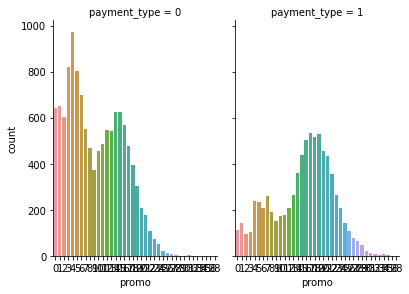

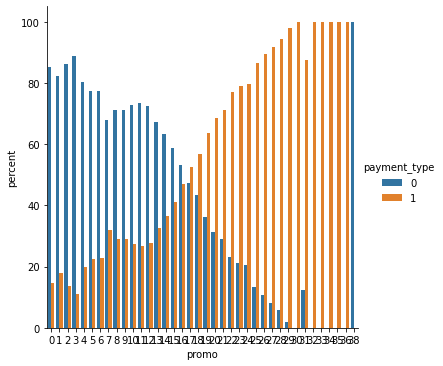

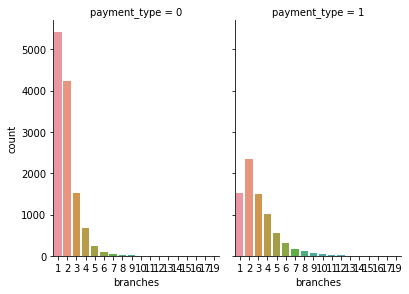

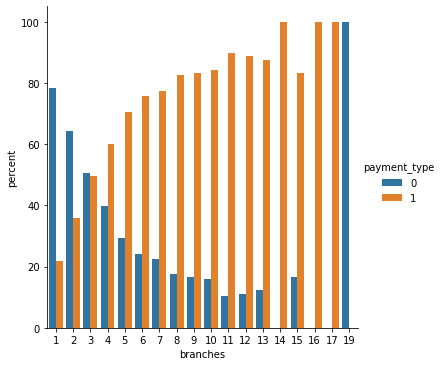

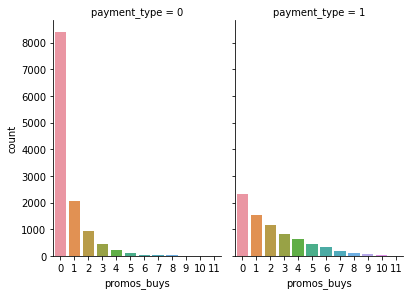

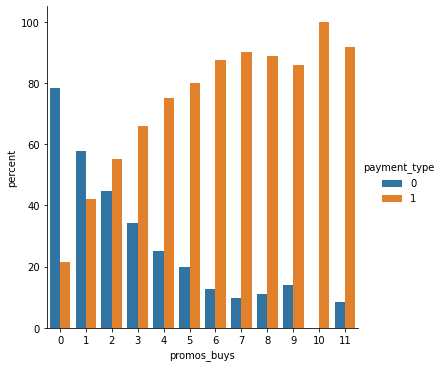

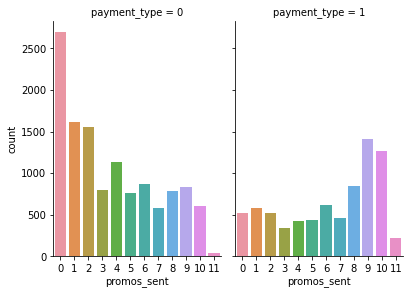

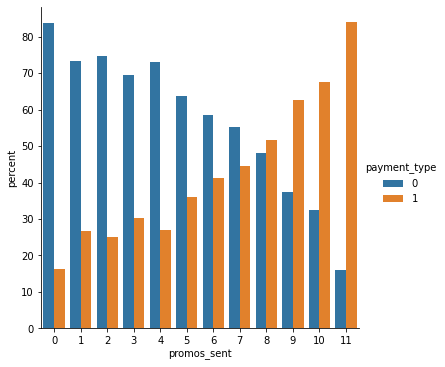

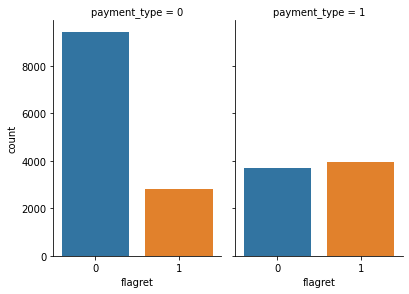

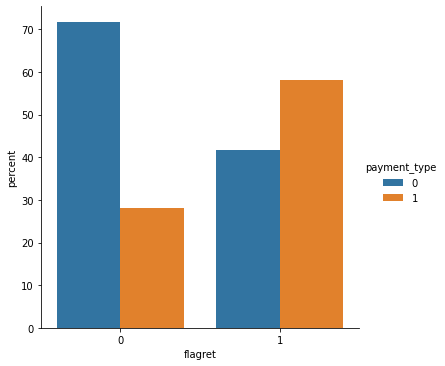

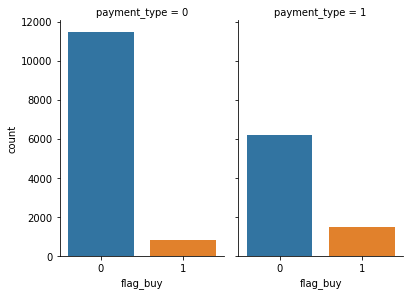

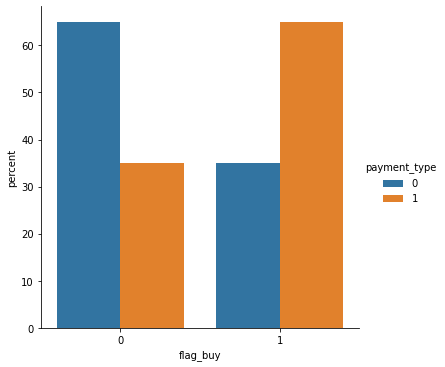

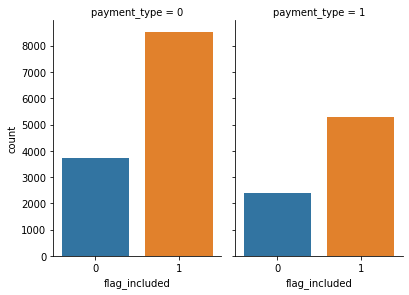

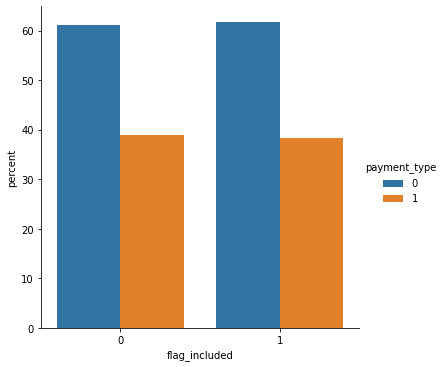

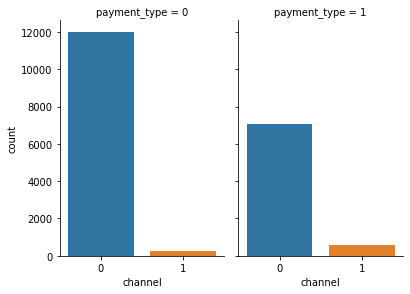

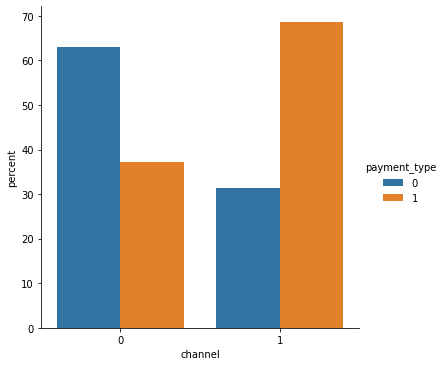

In [26]:
for i in cat_columns:
    catPlotCount(data3,i,'payment_type',True)

In [27]:
for i in cat_columns:
    Analisis_crosstab_target_vs(df,'payment_type',x,1)

NameError: name 'df' is not defined

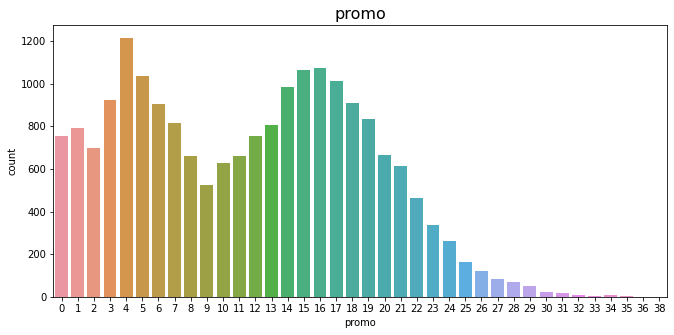

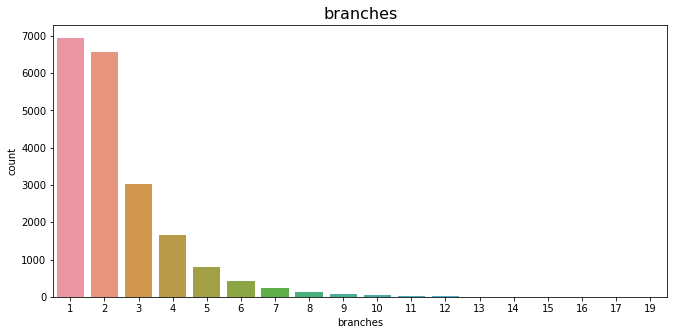

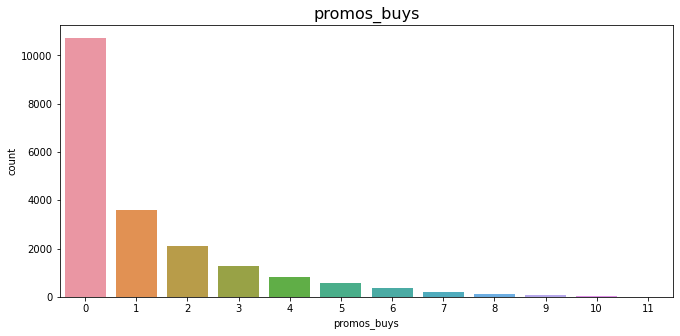

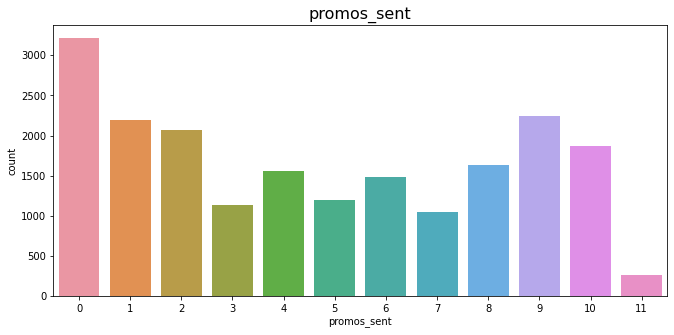

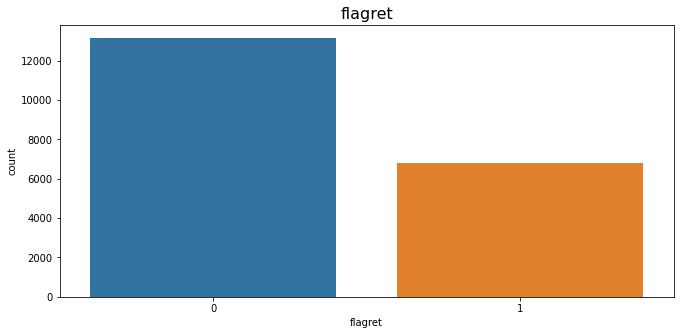

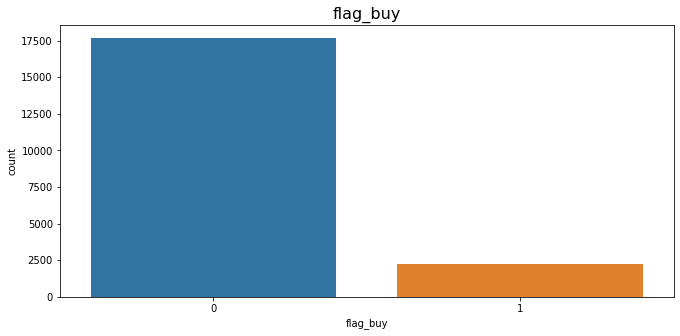

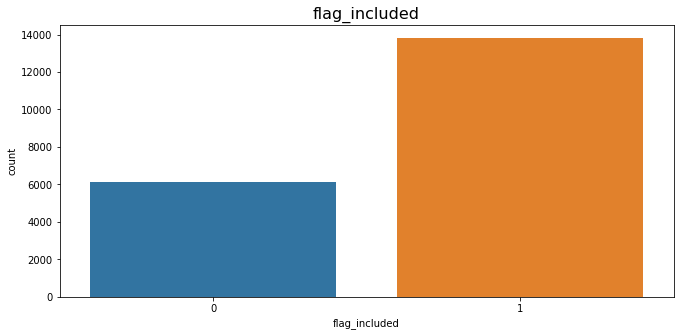

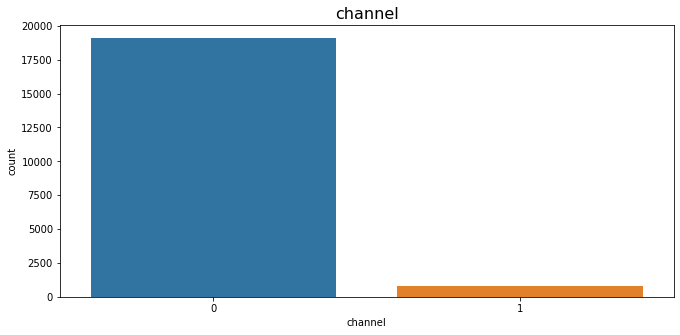

In [28]:
for i in cat_columns:
    plt.figure(figsize=(11,5))
    plt.title(i,fontsize=16)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(x=data3[i])
    plt.show()

### We create a Segments using K-Means and PCA

Steps to acomplish this clusters:
> 1) Choose the number of clusters (K), suing the elbow method

> 2) Specify clusters seeds (starting centroids).

> 3) Alocate each datapoints into a single centrod, using the squad Euclidean distance method.

> 4) Optimize the centroid's positions. 

#### Proeblem: the squared Euclidean distance is quite sensitive to outliers.
#### But first, let's standarize our data and then create a PCA.

In [29]:
data3.head()

cid  branch_amount_1  branch_amount_2  branch_amount_3  \
0  55600018227             0.00             0.00           192.00   
1  55600021052           144.69             0.00            16.19   
2  55600021210             0.00           141.29           138.60   
3  55600021232             0.00             0.00           380.18   
4  55600028433             0.00           623.24           230.23   

   branch_amount_4  promo  days_clients  branches  promos_sent  promos_buys  \
0             0.00     19           511         1            8            0   
1             0.00      4            91         2            0            0   
2             0.00     15           657         2            5            1   
3             0.00     24           384         3            7            2   
4             0.00     18           694         2           11            3   

   prod_unit  flagret  buy_frecuency state  county  flag_included  flag_buy  \
0     106.88        0         511.00    MN     550              1         0   
1      27.40        0          91.00    SC     290              1         0   
2      12.74        1          82.12    CA     947              0         0   
3      35.49        0          96.00    AR     722              0         0   
4      24.35        1          99.14    MD     207              1         0   

   age  total_amount  payment_type  channel  items  201701  201702  201703  \
0   49        192.00             0        0      6    0.00    0.00    0.00   
1   70        160.88             0        0      7    0.00    0.00    0.00   
2   49        279.89             0        0     13    0.00    0.00    0.00   
3   58        380.18             1        1     13    0.00    0.00    0.00   
4   66        853.47             0        0     31    0.00    0.00    0.00   

   201704  201705  201706  201707  201708  201709  201710  201711  201712  \
0    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
1    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2    0.00    0.00    0.00    0.00    0.00  279.89    0.00    0.00    0.00   
3    0.00    0.00    0.00  203.20    0.00    0.00    0.00    0.00    0.00   
4    0.00    0.00    0.00  642.47    0.00    0.00    0.00    0.00  211.00   

   201801  201802  201803  201804  201805  201806  
0  192.00    0.00    0.00    0.00    0.00    0.00  
1  160.88    0.00    0.00    0.00    0.00    0.00  
2    0.00    0.00    0.00    0.00    0.00    0.00  
3  137.00   39.98    0.00    0.00    0.00    0.00  
4    0.00    0.00    0.00    0.00  179.98    0.00

In [30]:
df_segmentation=data3.drop(columns={'state', 'flag_included', 'flag_buy','cid'})

### Standarization

In [31]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [32]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

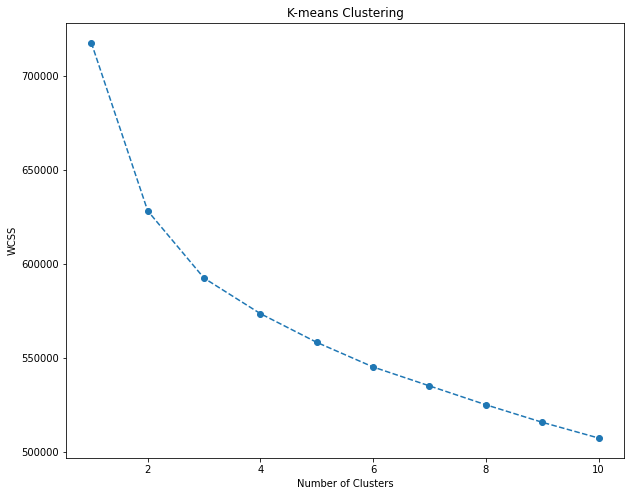

In [34]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [35]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

KMeans(n_clusters=3, random_state=42)

### Results

In [36]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means'])['total_amount','buy_frecuency','promos_sent','promos_buys','prod_unit','days_clients','promo','items'].mean()
df_segm_analysis

<ipython-input-36-7a90bb112243>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means'])['total_amount','buy_frecuency','promos_sent','promos_buys','prod_unit','days_clients','promo','items'].mean()


total_amount  buy_frecuency  promos_sent  promos_buys  \
Segment K-means                                                          
0                      206.64         222.25         2.65         0.18   
1                      616.98         107.15         7.34         2.14   
2                     2316.40          36.94         8.68         5.58   

                 prod_unit  days_clients  promo  items  
Segment K-means                                         
0                    50.35        351.81   7.50   6.90  
1                    21.10        551.20  16.73  23.81  
2                    13.96        607.64  20.97  88.00

In [37]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','items']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

total_amount  buy_frecuency  promos_sent  promos_buys  \
Segment K-means                                                          
0                      206.64         222.25         2.65         0.18   
1                      616.98         107.15         7.34         2.14   
2                     2316.40          36.94         8.68         5.58   

                 prod_unit  days_clients  promo  items  N Obs  Prop Obs  
Segment K-means                                                          
0                    50.35        351.81   7.50   6.90  11654      0.58  
1                    21.10        551.20  16.73  23.81   7130      0.36  
2                    13.96        607.64  20.97  88.00   1150      0.06

### It's crucial to name our segments. This allow to understand them and be able to talk about them (other people can easyly comprengend what the segment mean without any background).

>* Semgnet 1 - Standard: Less "total_amount" than the others, highest frecuency and the low quantity of items
>* Segment 2 - Silver: average "total_amount", average frecuency.
>* Segmente 3 - Gold: hightst "total_amount", lowest frecuency, highest quantity of items. Hight level of promos

In [38]:
df_segm_analysis.rename({0:'Standard',
                         1:'Silver',
                         2:'Gold'})

total_amount  buy_frecuency  promos_sent  promos_buys  \
Segment K-means                                                          
Standard               206.64         222.25         2.65         0.18   
Silver                 616.98         107.15         7.34         2.14   
Gold                  2316.40          36.94         8.68         5.58   

                 prod_unit  days_clients  promo  items  N Obs  Prop Obs  
Segment K-means                                                          
Standard             50.35        351.81   7.50   6.90  11654      0.58  
Silver               21.10        551.20  16.73  23.81   7130      0.36  
Gold                 13.96        607.64  20.97  88.00   1150      0.06

In [39]:
# Add the segment labels to our table
df_segm_kmeans['Segment'] = df_segm_kmeans['Segment K-means'].map({0:'Standard',
                         1:'Silver',
                         2:'Gold'})
df_segm_kmeans.head()

branch_amount_1  branch_amount_2  branch_amount_3  branch_amount_4  promo  \
0             0.00             0.00           192.00             0.00     19   
1           144.69             0.00            16.19             0.00      4   
2             0.00           141.29           138.60             0.00     15   
3             0.00             0.00           380.18             0.00     24   
4             0.00           623.24           230.23             0.00     18   

   days_clients  branches  promos_sent  promos_buys  prod_unit  flagret  \
0           511         1            8            0     106.88        0   
1            91         2            0            0      27.40        0   
2           657         2            5            1      12.74        1   
3           384         3            7            2      35.49        0   
4           694         2           11            3      24.35        1   

   buy_frecuency  county  age  total_amount  payment_type  channel  items  \
0         511.00     550   49        192.00             0        0      6   
1          91.00     290   70        160.88             0        0      7   
2          82.12     947   49        279.89             0        0     13   
3          96.00     722   58        380.18             1        1     13   
4          99.14     207   66        853.47             0        0     31   

   201701  201702  201703  201704  201705  201706  201707  201708  201709  \
0    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
1    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00  279.89   
3    0.00    0.00    0.00    0.00    0.00    0.00  203.20    0.00    0.00   
4    0.00    0.00    0.00    0.00    0.00    0.00  642.47    0.00    0.00   

   201710  201711  201712  201801  201802  201803  201804  201805  201806  \
0    0.00    0.00    0.00  192.00    0.00    0.00    0.00    0.00    0.00   
1    0.00    0.00    0.00  160.88    0.00    0.00    0.00    0.00    0.00   
2    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
3    0.00    0.00    0.00  137.00   39.98    0.00    0.00    0.00    0.00   
4    0.00    0.00  211.00    0.00    0.00    0.00    0.00  179.98    0.00   

   Segment K-means   Segment  
0                0  Standard  
1                0  Standard  
2                1    Silver  
3                1    Silver  
4                1    Silver

d:\Data Science Proyects\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


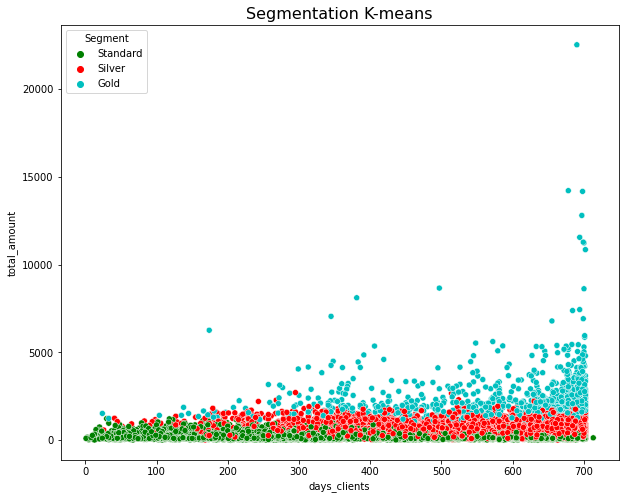

In [40]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['days_clients']
y_axis = df_segm_kmeans['total_amount']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Segment'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means',fontsize=16)
plt.show()

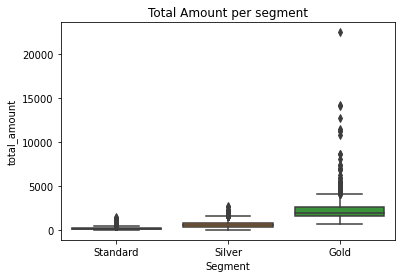

In [41]:
sns.boxplot(x=df_segm_kmeans.Segment, y=df_segm_kmeans['total_amount'])
plt.title('Total Amount per segment')
plt.show()

### K-means Clusters using PCA (Principal Component Analysis)

In [42]:
# Dimensionality Reduction // linear algebra
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

# Fit PCA with our standardized data.
# PCA arranged in order of importance
pca.fit(segmentation_std)

# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([2.07051740e-01, 5.76729518e-02, 4.28449531e-02, 3.34453502e-02,
       3.29068326e-02, 3.13756285e-02, 3.12633556e-02, 2.98189809e-02,
       2.96455059e-02, 2.91388555e-02, 2.88323328e-02, 2.87624324e-02,
       2.84125221e-02, 2.82502482e-02, 2.76765140e-02, 2.75868280e-02,
       2.75177193e-02, 2.63743465e-02, 2.61512796e-02, 2.52842866e-02,
       2.44689211e-02, 2.37207768e-02, 2.32163866e-02, 2.04797292e-02,
       1.92420199e-02, 1.74822568e-02, 1.53822050e-02, 1.38708870e-02,
       1.28592907e-02, 1.02584222e-02, 7.72612095e-03, 5.92009050e-03,
       2.86015426e-03, 2.37755543e-03, 1.22520396e-04, 3.79592069e-30])

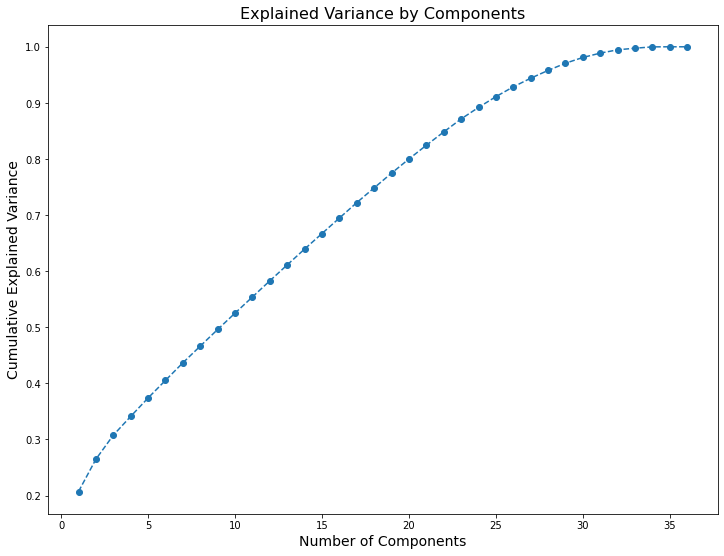

In [43]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,37), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)
plt.show()

To preserve as much information as possible, we need to use at least 25 components (that keeps the 80% of the information). So I decide to not use this method.

We need to put the segments's results into dummies in order to continue our analysis

In [44]:
df_segm_kmeans.drop(columns={'Segment K-means'}, axis=1, inplace=True)


def create_dummies(df,varname):
    dummy=pd.get_dummies(df[varname])
    df = df.drop(varname,axis=1)
    df=pd.concat([df,dummy], axis=1)
    return df

df = create_dummies(df_segm_kmeans,'Segment')

In [45]:
df.head()

branch_amount_1  branch_amount_2  branch_amount_3  branch_amount_4  promo  \
0             0.00             0.00           192.00             0.00     19   
1           144.69             0.00            16.19             0.00      4   
2             0.00           141.29           138.60             0.00     15   
3             0.00             0.00           380.18             0.00     24   
4             0.00           623.24           230.23             0.00     18   

   days_clients  branches  promos_sent  promos_buys  prod_unit  flagret  \
0           511         1            8            0     106.88        0   
1            91         2            0            0      27.40        0   
2           657         2            5            1      12.74        1   
3           384         3            7            2      35.49        0   
4           694         2           11            3      24.35        1   

   buy_frecuency  county  age  total_amount  payment_type  channel  items  \
0         511.00     550   49        192.00             0        0      6   
1          91.00     290   70        160.88             0        0      7   
2          82.12     947   49        279.89             0        0     13   
3          96.00     722   58        380.18             1        1     13   
4          99.14     207   66        853.47             0        0     31   

   201701  201702  201703  201704  201705  201706  201707  201708  201709  \
0    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
1    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00  279.89   
3    0.00    0.00    0.00    0.00    0.00    0.00  203.20    0.00    0.00   
4    0.00    0.00    0.00    0.00    0.00    0.00  642.47    0.00    0.00   

   201710  201711  201712  201801  201802  201803  201804  201805  201806  \
0    0.00    0.00    0.00  192.00    0.00    0.00    0.00    0.00    0.00   
1    0.00    0.00    0.00  160.88    0.00    0.00    0.00    0.00    0.00   
2    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
3    0.00    0.00    0.00  137.00   39.98    0.00    0.00    0.00    0.00   
4    0.00    0.00  211.00    0.00    0.00    0.00    0.00  179.98    0.00   

   Gold  Silver  Standard  
0     0       0         1  
1     0       0         1  
2     0       1         0  
3     0       1         0  
4     0       1         0

In [46]:
data4=data3['flag_buy']
df = pd.concat([df,data4],axis=1)
df

branch_amount_1  branch_amount_2  branch_amount_3  branch_amount_4  \
0                 0.00             0.00           192.00             0.00   
1               144.69             0.00            16.19             0.00   
2                 0.00           141.29           138.60             0.00   
3                 0.00             0.00           380.18             0.00   
4                 0.00           623.24           230.23             0.00   
...                ...              ...              ...              ...   
19929             0.00             0.00            39.00             0.00   
19930             0.00             0.00           213.22            67.37   
19931             0.00           785.31           489.65             0.00   
19932             0.00            13.99           251.95             0.00   
19933             0.00            47.99           426.47            80.96   

       promo  days_clients  branches  promos_sent  promos_buys  prod_unit  \
0         19           511         1            8            0     106.88   
1          4            91         2            0            0      27.40   
2         15           657         2            5            1      12.74   
3         24           384         3            7            2      35.49   
4         18           694         2           11            3      24.35   
...      ...           ...       ...          ...          ...        ...   
19929      7           323         2            1            0      15.83   
19930     12           203         3            5            2       8.67   
19931     17           341         4            7            2      19.71   
19932     12           257         2            7            0      11.63   
19933     19           270         6            6            2      18.07   

       flagret  buy_frecuency  county  age  total_amount  payment_type  \
0            0         511.00     550   49        192.00             0   
1            0          91.00     290   70        160.88             0   
2            1          82.12     947   49        279.89             0   
3            0          96.00     722   58        380.18             1   
4            1          99.14     207   66        853.47             0   
...        ...            ...     ...  ...           ...           ...   
19929        1         161.50     442   63         39.00             0   
19930        1          33.83      21   70        280.59             0   
19931        1          37.88      34   44       1274.96             0   
19932        1          85.66      11   50        265.94             0   
19933        0          54.00     731   58        555.42             1   

       channel  items  201701  201702  201703  201704  201705  201706  201707  \
0            0      6    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
1            0      7    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2            0     13    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
3            1     13    0.00    0.00    0.00    0.00    0.00    0.00  203.20   
4            0     31    0.00    0.00    0.00    0.00    0.00    0.00  642.47   
...        ...    ...     ...     ...     ...     ...     ...     ...     ...   
19929        0      3    0.00    0.00    0.00    0.00   39.00    0.00    0.00   
19930        0     12    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
19931        0     47    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
19932        0     15    0.00  265.94    0.00    0.00    0.00    0.00    0.00   
19933        0     22    0.00    0.00    0.00    0.00    0.00  193.45    0.00   

       201708  201709  201710  201711  201712  201801  201802  201803  201804  \
0        0.00    0.00    0.00    0.00    0.00  192.00    0.00    0.00    0.00   
1        0.00    0.00    0.00    0.00    0.00  160.88    0.00    0.00    0.00   
2        0.00  279.89    0.00    0.00    0.00    0.0

## Model

flag_buy
0    17670
1     2264
dtype: int64


Total of records 19934



the proportion of "Buy" is: 88.64 %
the proportion of "Not Buy" is: 11.36 %



d:\Data Science Proyects\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


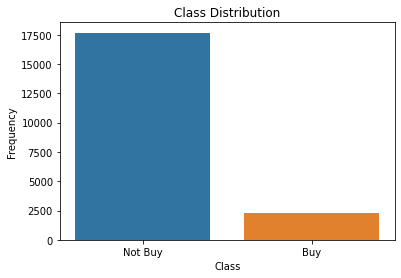

In [47]:
class_counts = df.groupby('flag_buy').size()
print(class_counts)
print('\n')
print('Total of records',len(df))
print('\n'*2)
print('the proportion of "Buy" is:',round(class_counts[0]/len(df)*100,2),'%')
print('the proportion of "Not Buy" is:',round(class_counts[1]/len(df)*100,2),'%')
print('\n'*2)

LABELS = ["Not Buy", "Buy"]
count_classes = sns.countplot(df['flag_buy'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [48]:
X = df.copy()
X = X.drop(columns={'flag_buy'})
y=df['flag_buy']

In [49]:
# test estadístico sobre las variables x e y

x2 = sm.add_constant(X)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               flag_buy   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     245.1
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        00:18:44   Log-Likelihood:                -1658.9
No. Observations:               19934   AIC:                             3394.
Df Residuals:                   19896   BIC:                             3694.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.364e+04   3.09e+04     

In [53]:
# Split in train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)



In [55]:
# Applay Over-sampling (SMOTE)

# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)

# X_train, y_train = smote.fit_resample(X_train, y_train)

# Applay Over and Under - Samppling (SOMTE - Tomek)

from imblearn.combine import SMOTETomek

smoteT = SMOTETomek(random_state=38)

X_train, y_train = smoteT.fit_resample(X_train, y_train)

d:\Data Science Proyects\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


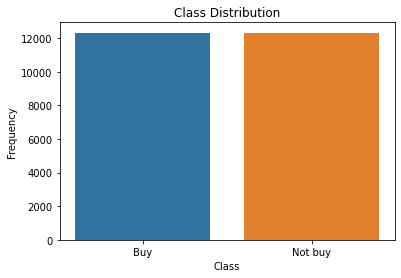

In [56]:
LABELS = ["Buy", "Not buy"]
count_classes = sns.countplot(y_train)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

### Feature Importance

In [57]:
from sklearn.ensemble import RandomForestClassifier

algoritmo = RandomForestClassifier(n_estimators=30,max_features='sqrt',criterion='entropy')

# Entreno el modelo

clf = algoritmo.fit(X_train,y_train)

y_predict = algoritmo.predict(X_test)

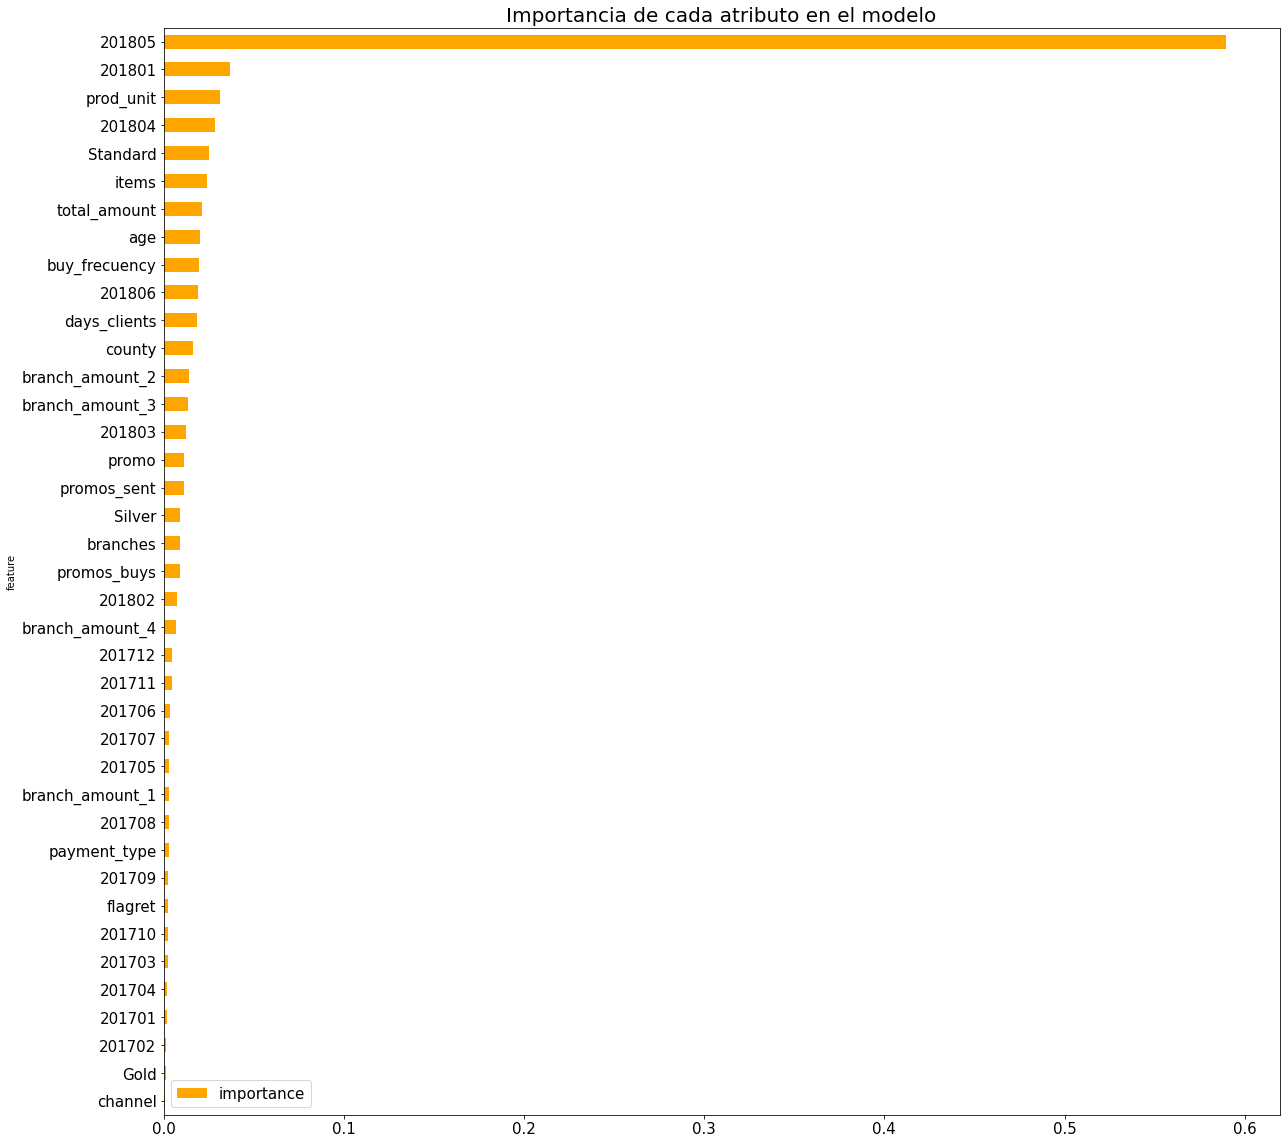

In [58]:
X_train=pd.DataFrame(X_train)
X_train.head()
features = pd.DataFrame()

features['feature'] = X_train.columns

features['importance'] = clf.feature_importances_

features.sort_values(by=['importance'], ascending=True, inplace=True)

features.set_index('feature', inplace=True)


# Para verlo de forma gráfica:
features.plot(kind='barh', figsize=(20, 20),color='orange',fontsize=15)
plt.title('Importancia de cada atributo en el modelo',fontsize=20)
plt.legend(fontsize=15)
plt.show()

### Training the model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [60]:
LR = LogisticRegression(random_state=38).fit(X_train,y_train)
DT = tree.DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)
RF = RandomForestClassifier(random_state=36).fit(X_train,y_train)
NB = GaussianNB().fit(X_train,y_train)
NN = MLPClassifier(hidden_layer_sizes=5).fit(X_train,y_train)

d:\Data Science Proyects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
LR_Predictions = LR.predict(X_test)
DT_Predictions = DT.predict(X_test)
RF_Predictions = RF.predict(X_test)
NB_Predictions = NB.predict(X_test)
NN_Predictions = NN.predict(X_test)

In [62]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Regresion logística: ",cross_val_score(LR,X_train,y_train).mean())
print("Cross Validation Arbol decisión: ",cross_val_score(DT,X_train,y_train).mean())
print("Cross Validation Random Forest: ",cross_val_score(RF,X_train,y_train).mean())
print("Cross Validation Bayes: ",cross_val_score(NB,X_train,y_train).mean())
print("Cross Validation Redes Neuronales: ",cross_val_score(NN,X_train,y_train).mean())

d:\Data Science Proyects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Data Science Proyects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [65]:
PredProbaLR=LR.predict_proba(X_test)

results = pd.DataFrame(data= PredProbaLR,columns=['prob_0','prob_1'])
results.head()

prob_0  prob_1
0    0.96    0.04
1    0.93    0.07
2    0.62    0.38
3    0.97    0.03
4    0.58    0.42

In [56]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,precision_score, recall_score,accuracy_score

In [57]:
print("Regresión logística -> ", "Accuracy: ", round(accuracy_score(y_test, LR_Predictions),2), "Precision: ", round(precision_score(y_test, LR_Predictions),2), "Recall: ", round(recall_score(y_test, LR_Predictions),2),"AUC:",round(roc_auc_score(y_test, LR_Predictions),2))
print("Arbol de decisión -> ", "Accuracy: ", round(accuracy_score(y_test, DT_Predictions),2), "Precision: ", round(precision_score(y_test, DT_Predictions),2), "Recall: ", round(recall_score(y_test, DT_Predictions),2),"AUC:",round(roc_auc_score(y_test, DT_Predictions),2))
print("Random Forest -> ", "Accuracy: ", round(accuracy_score(y_test, RF_Predictions),2), "Precision: ", round(precision_score(y_test, RF_Predictions),2), "Recall: ", round(recall_score(y_test, RF_Predictions),2),"AUC:",round(roc_auc_score(y_test, RF_Predictions),2))
print("Bayes -> ", "Accuracy: ", round(accuracy_score(y_test, NB_Predictions),2), "Precision: ", round(precision_score(y_test, NB_Predictions),2), "Recall: ", round(recall_score(y_test, NB_Predictions),2),"AUC:",round(roc_auc_score(y_test, NB_Predictions),2))
print("Redes Neuronales -> ", "Accuracy: ", round(accuracy_score(y_test, NN_Predictions),2), "Precision: ", round(precision_score(y_test, NN_Predictions),2), "Recall: ", round(recall_score(y_test, NN_Predictions),2),"AUC:",round(roc_auc_score(y_test, NN_Predictions),2))

Regresión logística ->  Accuracy:  0.9 Precision:  0.52 Recall:  0.91 AUC: 0.9
Arbol de decisión ->  Accuracy:  0.92 Precision:  0.59 Recall:  0.97 AUC: 0.94
Random Forest ->  Accuracy:  0.94 Precision:  0.68 Recall:  0.9 AUC: 0.92
Bayes ->  Accuracy:  0.81 Precision:  0.3 Recall:  0.48 AUC: 0.67
Redes Neuronales ->  Accuracy:  0.86 Precision:  0.43 Recall:  0.85 AUC: 0.85


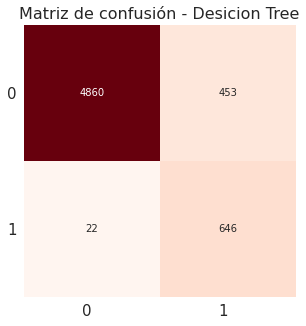

In [58]:
cm_t = confusion_matrix(y_test, DT_Predictions)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm_t, 
                     square=True,
                     cmap="Reds",
                     annot=True,
                     fmt="d",
                     cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
plt.title('Matriz de confusión - Desicion Tree',fontsize = 16)
plt.show()

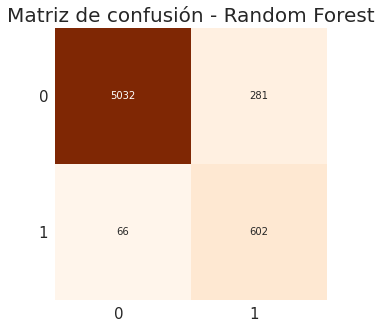

In [59]:
cm_t = confusion_matrix(y_test, RF_Predictions)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm_t, 
                     square=True,
                     cmap="Oranges",
                     annot=True,
                     fmt="d",
                     cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
plt.title('Matriz de confusión - Random Forest',fontsize = 20)
plt.show()

In [87]:
from sklearn.metrics import confusion_matrix,classification_report
print('Decision Tree metrics')
print(classification_report(y_test, DT_Predictions))
print('Decision Tree Grid metrics')
print(classification_report(y_test, DT_grid_Predictions))
print('Rambdom Forest metrics')
print(classification_report(y_test, RF_Predictions))

Decision Tree metrics
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      5313
           1       0.54      0.99      0.70       668

    accuracy                           0.90      5981
   macro avg       0.77      0.94      0.82      5981
weighted avg       0.95      0.90      0.92      5981

Decision Tree Grid metrics
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5313
           1       0.64      0.76      0.70       668

    accuracy                           0.93      5981
   macro avg       0.81      0.85      0.83      5981
weighted avg       0.93      0.93      0.93      5981

Rambdom Forest metrics
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      5313
           1       0.67      0.90      0.77       668

    accuracy                           0.94      5981
   macro avg       0.83      0.92      0.87      5981
we

### Hiper-parameter Tunning

In [88]:
from sklearn.model_selection import GridSearchCV

#Declaramos las variables que van a hiperparametrizarse
param_grid = [{'criterion': ['gini','entropy'],
              'max_depth': [None, 50, 100, 200, 500],
              'min_samples_split': [2,3,4]}]

#Inicializamos la búsqueda grid
DT_grid = GridSearchCV(DT, param_grid, cv = 5, n_jobs = -1, scoring = 'recall')

#Entrenamos con los datos de entreno...
DT_grid.fit(X_train,y_train)

#Pintamos los resultados:
print("Best parameters: ")
print(DT_grid.best_params_)
print()
print("Scores: ")
print(DT_grid.cv_results_['mean_test_score'])

Best parameters: 
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3}

Scores: 
[0.95014556 0.94803438 0.94819705 0.95022653 0.94982082 0.94844046
 0.95111975 0.94657295 0.94616704 0.95063284 0.94917147 0.94762847
 0.95079521 0.94714146 0.94673532 0.95103924 0.95144515 0.9505523
 0.95087638 0.95120138 0.94933407 0.95006479 0.94917187 0.95103911
 0.95128269 0.95079561 0.94949658 0.95063287 0.9504708  0.95112048]


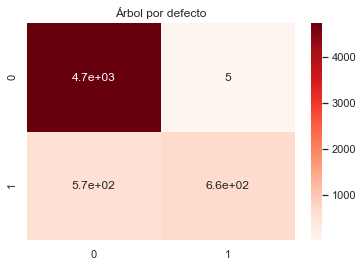

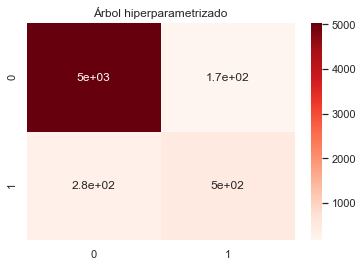

In [89]:
DT_grid_Predictions = DT_grid.predict(X_test)
#Obtención de la matriz
arrayDTS = confusion_matrix(DT_Predictions, y_test)
arrayGrid = confusion_matrix(DT_grid_Predictions, y_test)
df_cmDTS = pd.DataFrame(arrayDTS)
df_cmGrid = pd.DataFrame(arrayGrid)

#Representación de la matriz de confusión
sns.set(font_scale=1)
plt.title('Árbol por defecto')
plt.show(sns.heatmap(df_cmDTS, annot=True, cmap = 'Reds')) 
plt.title('Árbol hiperparametrizado')
plt.show(sns.heatmap(df_cmGrid, annot=True , cmap = 'Reds'))
#annot_kws={"size": 8}

In [90]:
df_cmDTS

0    1
0  4742    5
1   571  663

In [91]:
df_cmGrid

0    1
0  5030  167
1   283  501

In [61]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    plt.show()
    
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr,x_fpr,x_tpr,x_fpr2,x_tpr2):
    plt.figure(figsize=(8,6))
    plt.title('Curva ROC', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Desicion Tree')
    plt.plot(nav_fpr, nav_tpr, label='Random forest')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('D.T. AUC: 94%', xy=(0.5, 0.5), xytext=(0.7, 0.2), fontsize=16)
    plt.annotate('R.F. AUC: 92%', xy=(0.5, 0.5), xytext=(0.7, 0.1), fontsize=16)
    plt.legend()

In [62]:
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_test, RF_Predictions)
dt_fpr, dt_tpr, dt_thresold = roc_curve(y_test, DT_Predictions)

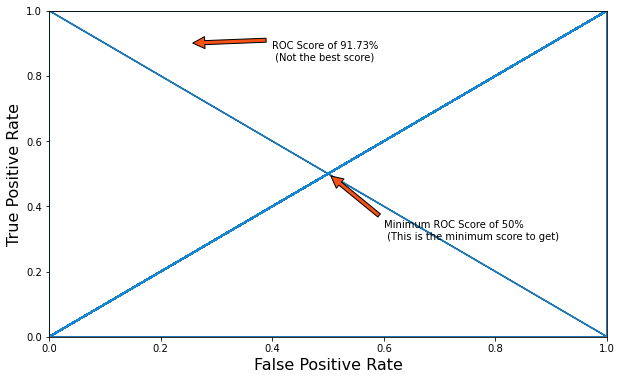

In [74]:
graph_roc_curve(y_test, DT_Predictions)
plt.show()

In [139]:
q=roc_curve(y_test, RF_Predictions)
plt.show()

### Model Storage

In [ ]:
import pickle

#File Name
filename = 'LR.model'

#We save the model
pickle.dump(LP, open(filename, 'wb'))

In [ ]:
#then it can be retrieved to be used in another file
# modelMLP2 = pickle.load(open('modelMLP.model','rb'))
# modelMLP2 == modelMLP